<h1 style='text-align:center'>Name - Ranjan Sarkar</h1>
<h2 style='text-align:center'>2 Year MSc Mathematics</h2>
<h2 style='text-align:center'>Roll - 21MA40022</h2>

---

# Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [2]:
car = pd.read_csv('cars.csv')
car.sample(7)

,brand,km_driven,fuel,owner,selling_price
5694,Ford,200185,Petrol,First Owner,136000
6102,Ford,60000,Diesel,First Owner,675000
4333,Hyundai,56290,Diesel,First Owner,450000
2144,Renault,100000,Diesel,Second Owner,345000
6419,Tata,55768,Diesel,First Owner,170000
4707,Toyota,20000,Diesel,First Owner,2000000
558,Nissan,50000,Petrol,First Owner,325000


In [31]:
car.iloc[1]

brand                   Skoda
km_driven              120000
fuel                   Diesel
owner            Second Owner
selling_price          370000
Name: 1, dtype: object

In [3]:
car.shape

(8128, 5)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


<div class = 'alert alert-block alert-success'>
    No. of Total Columns = 5 <br>
    No. of Numerical Columns = 2 <br>
    No. of Categorical Columns = 3
</div>

In [5]:
pd.options.display.float_format = "{:.2f}".format
car.describe(include = 'all')

,brand,km_driven,fuel,owner,selling_price
count,8128,8128.00,8128,8128,8128.00
unique,32,NaN,4,5,NaN
top,Maruti,NaN,Diesel,First Owner,NaN
freq,2448,NaN,4402,5289,NaN
mean,NaN,69819.51,NaN,NaN,638271.81
std,NaN,56550.55,NaN,NaN,806253.40
min,NaN,1.00,NaN,NaN,29999.00
25%,NaN,35000.00,NaN,NaN,254999.00
50%,NaN,60000.00,NaN,NaN,450000.00
75%,NaN,98000.00,NaN,NaN,675000.00


## Simple EDA to understand the Data

### Fuel type

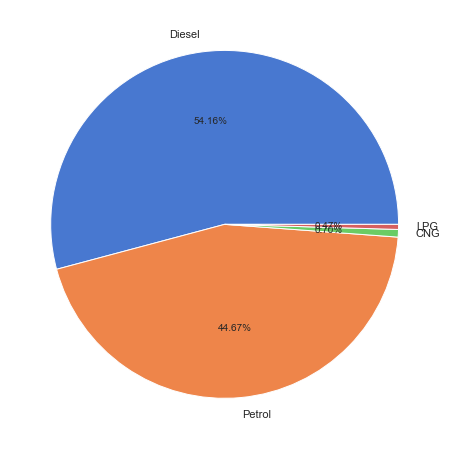

Diesel   54.16
Petrol   44.67
CNG       0.70
LPG       0.47
Name: fuel, dtype: float64

In [6]:
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'muted')
plt.figure(figsize = (12,8))
data = car.fuel.value_counts()
plt.pie(data, labels = data.index, autopct='%.2f%%')
plt.show()
data * 100 / data.sum()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <p> Diesel (54.16%) & Petrol (44.67%) Engines are more popular than LPG, CNG. </p>
</div>

## Brand vs. Selling_Price

In [7]:
car.brand.nunique()

32

There are 32 brands

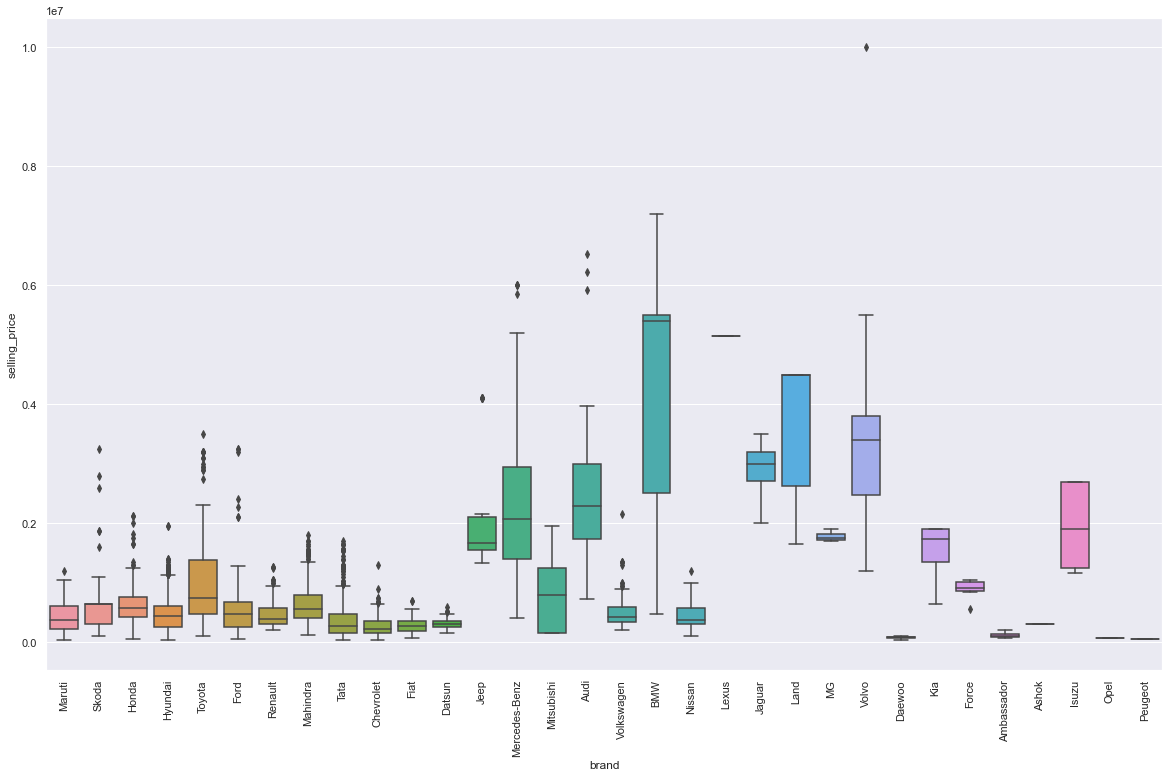

In [8]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'brand', y = 'selling_price', data = car)
plt.xticks(rotation = 90)
plt.show()

## km_driven Vs. Selling Price

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


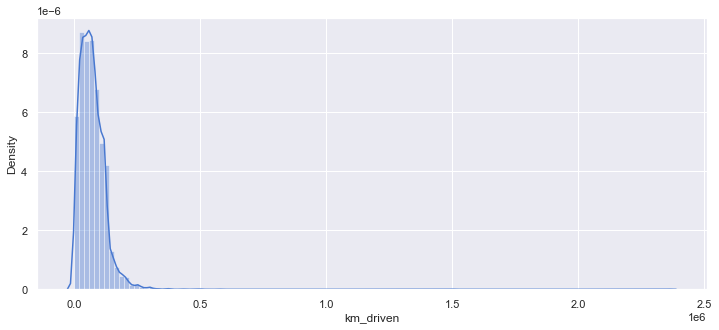

In [9]:
plt.figure(figsize = (12,5))
sns.distplot(car.km_driven, bins = 120)
plt.show()

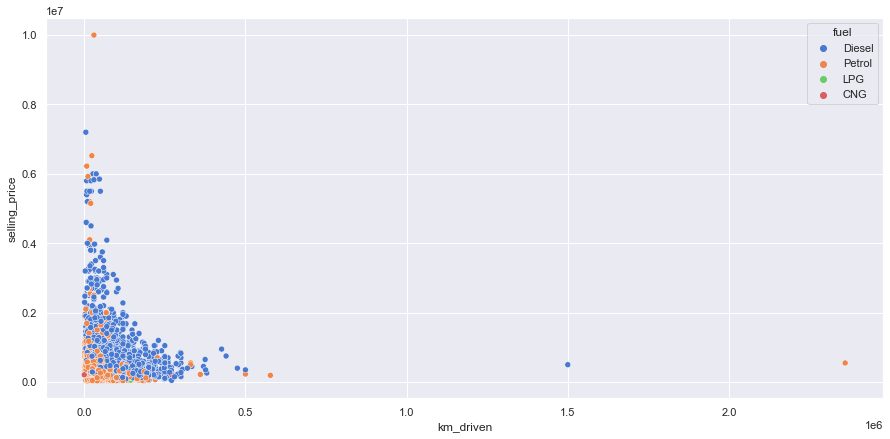

In [10]:
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'km_driven' , y = 'selling_price', hue = 'fuel', data = car)
plt.show()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <p> On an average cars have been driven around 60k kms. Also there are some outliers which have higher kms_driven value but their selling price is much lower than the others. </p>
</div>

#### Selecting Brands having descent number of datapoints

In [11]:
brand_names = car.brand.value_counts()
th = brand_names.sum() * 0.005    # taking 0.5 % of total as a thresold
brand_names = brand_names[brand_names > th]
brand_names

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Name: brand, dtype: int64

#### Plotting for separate brands

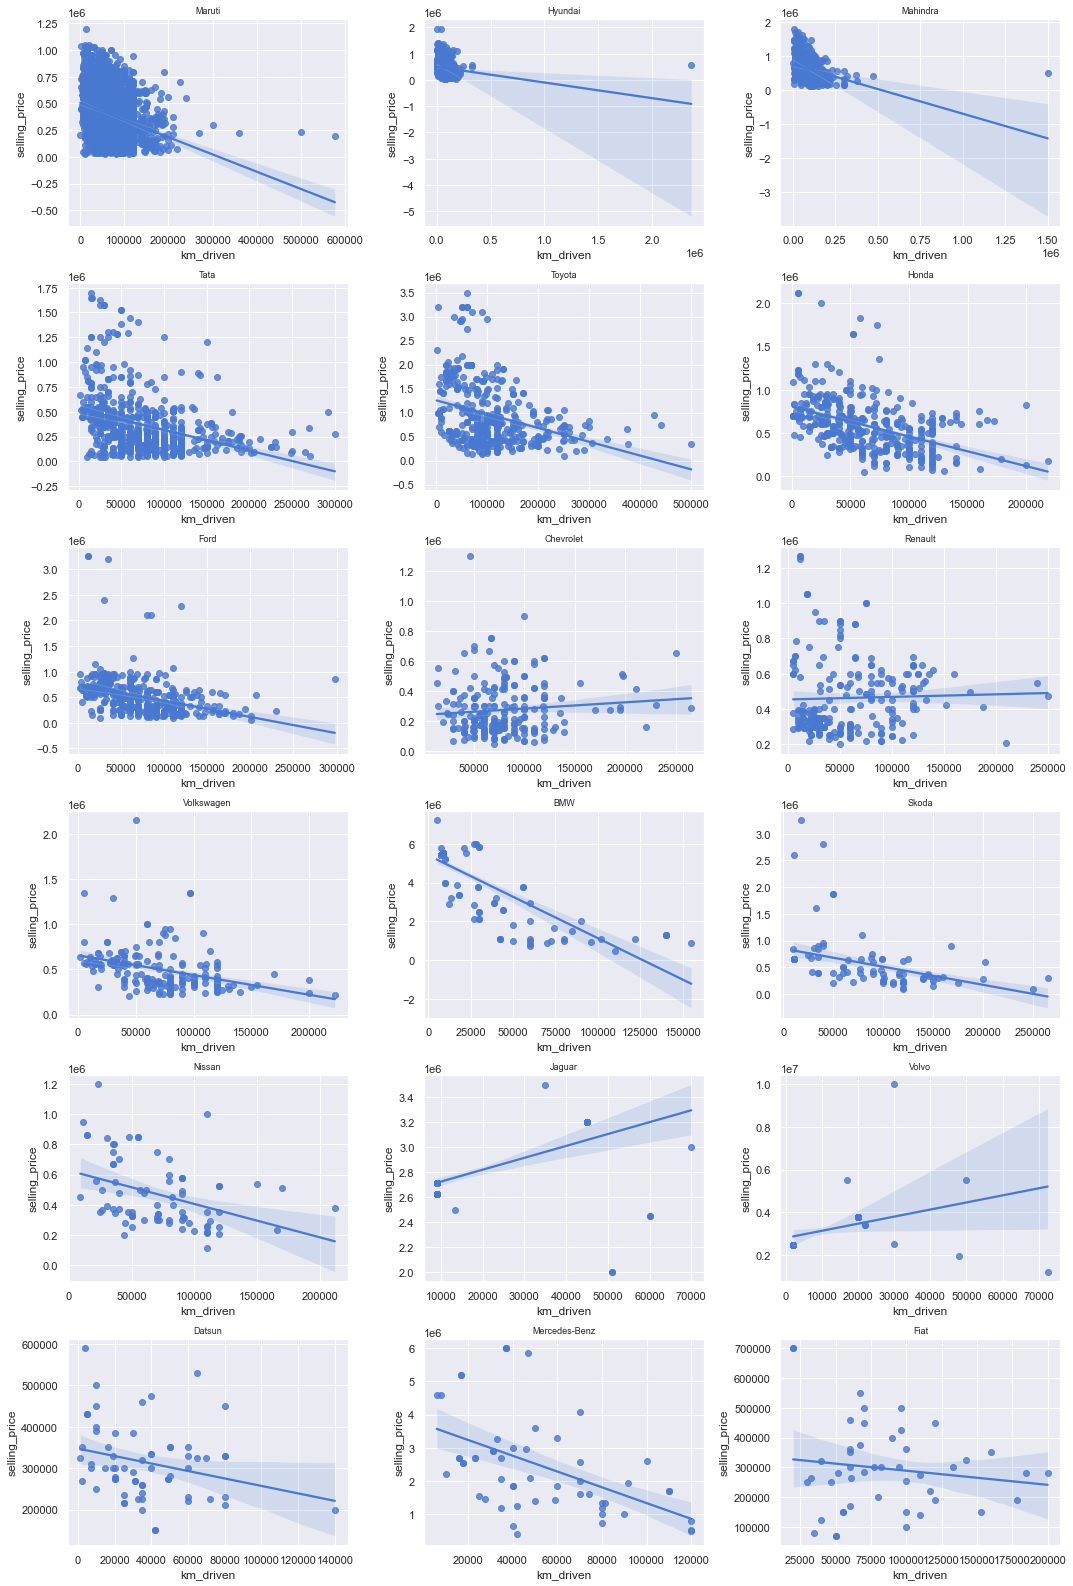

In [12]:
from matplotlib import gridspec

plt.figure(figsize=(15,40))
gs = gridspec.GridSpec(11, 3)

for i, c in enumerate(brand_names.index):
    ax = plt.subplot(gs[i])
    sns.regplot(x = 'km_driven', y = 'selling_price', data = car[car.brand == c])
    ax.set_title(c,size=9)
#     ax.set_xlabel('')
#     ax.set_ylabel('')
    plt.tight_layout()

plt.show()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <p> It's not fair to compare KMs driven and selling price including all company. So I have plotted km_driven vs selling_price grouped on differnt brands.
    </p>
    <ul>
        <li> Usually the more the distance the car is driven, the lesser value it gets in the market. </li>
        <li> The price of used cards fall linearly. </li>
    </ul>
</div>

## Owner vs. Selling Price

In [13]:
car.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

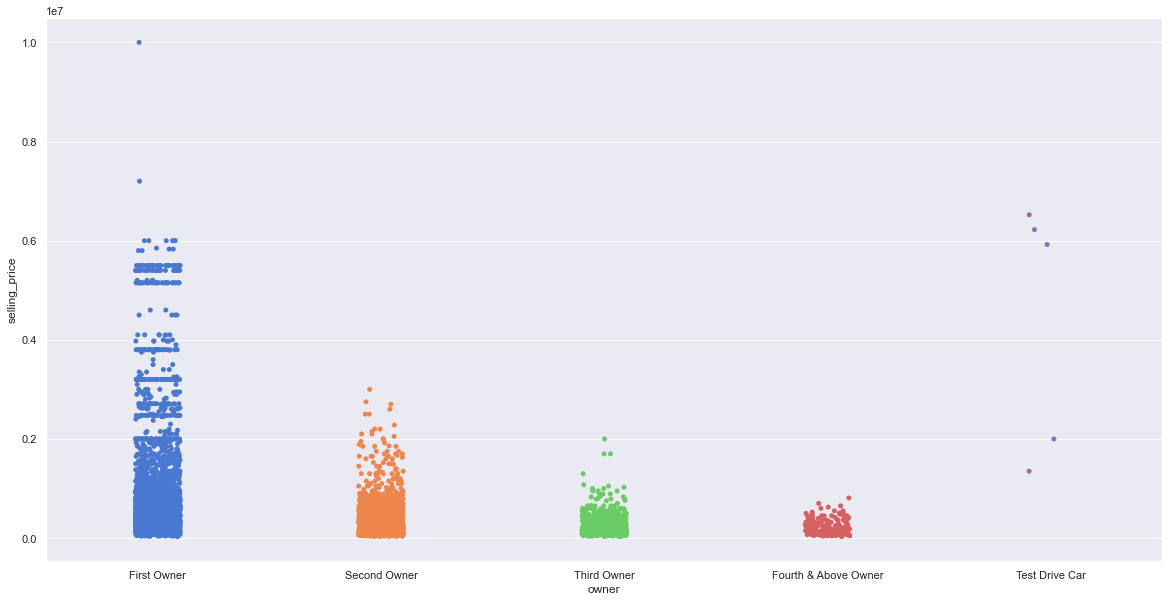

In [14]:
plt.figure(figsize=(20,10))
sns.stripplot(x = 'owner', y = 'selling_price', data = car)
plt.show()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <ul>
        <li> Most of the Cars are from First Owner, it has been sold with higher amount than the other groups. </li>
        <li> Higher <b> the number of owners </b> will be, lesser the <b> selling price </b> will be. </li>
    </ul>
</div>

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


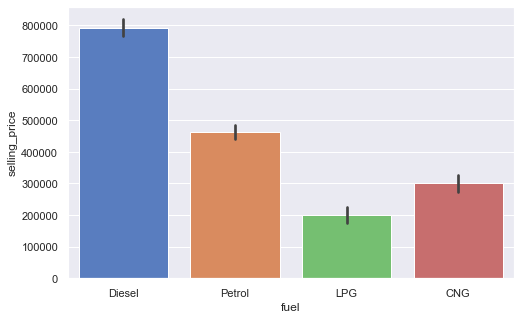

In [15]:
plt.figure(figsize = (8, 5))
sns.barplot(car.fuel, car.selling_price)
plt.show()

<div class = 'alert alert-block alert-info'>
    <h3> Observation: </h3>
    <ul>
        <li> Cars having Diesel engine can be sold with Higher Price. </li>
        <li> In the other hand, LPG cars are cheapest to buy. </li>
    </ul>
</div>

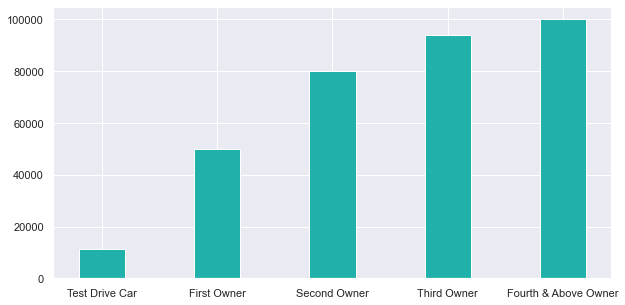

In [16]:
plt.figure(figsize = (10,5))
x = car.groupby(by = 'owner').median().sort_values('km_driven')
plt.bar(x.index, x['km_driven'], 0.4, color = 'lightseagreen')
plt.show()

## Making Model for Prediction the Selling Price

In [17]:
X = car.drop(['selling_price'], axis = 1)
y = car['selling_price']

In [18]:
display(X)
display(y)

,brand,km_driven,fuel,owner
0,Maruti,145500,Diesel,First Owner
1,Skoda,120000,Diesel,Second Owner
2,Honda,140000,Petrol,Third Owner
3,Hyundai,127000,Diesel,First Owner
4,Maruti,120000,Petrol,First Owner
...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner
8124,Hyundai,119000,Diesel,Fourth & Above Owner
8125,Maruti,120000,Diesel,First Owner
8126,Tata,25000,Diesel,First Owner


0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

#### Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
X_train.describe()

,km_driven
count,6502.00
mean,69809.41
std,58769.62
min,1.00
25%,35000.00
50%,60000.00
75%,98000.00
max,2360457.00


Min = 1, Max = 2360457 <br>
So, we should Scale the data property.

<div class = 'alert alert-block alert-success'>
    <h3> Transformer: </h3>
    <ol>
        <li> Column Transformer: Brand, Fuel, Owner </li>
        <li> Min-Max Scaling: km_driven </li>
    </ol>
</div>

In [22]:
trf = ColumnTransformer([
    ('tf1', OneHotEncoder(drop = 'first', sparse = False, handle_unknown = 'ignore'), ['brand', 'fuel']),
    ('tf2', OrdinalEncoder(categories = [x.index.tolist()]),['owner']),
    ('tf3', MinMaxScaler(), ['km_driven'])],
    remainder = 'passthrough'
)
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('tf1',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['brand', 'fuel']),
                                ('tf2',
                                 OrdinalEncoder(categories=[['Test Drive Car',
                                                             'First Owner',
                                                             'Second Owner',
                                                             'Third Owner',
                                                             'Fourth & Above '
                                                             'Owner']]),
                                 ['owner']),
                                ('tf3', MinMaxScaler(), ['km_driven'])])

In [23]:
pd.set_option('display.max_columns', None)
pd.DataFrame(trf.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.05
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.01
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.01
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.02
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.07
6498,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,0.03
6499,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.03
6500,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,0.03


In [24]:
model = LinearRegression()
pipe = make_pipeline(trf, model)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['brand', 'fuel']),
                                                 ('tf2',
                                                  OrdinalEncoder(categories=[['Test '
                                                                              'Drive '
                                                                              'Car',
                                                                              'First '
                                                                              'Owner',
                                                                              'Second '
                                                                              'Owner',
                                                                              'Third '
                                                                              'Owner',
                                                                              'Fourth '
                                                                              '& '
                                                                              'Above '
                                                                              'Owner']]),
                                                  ['owner']),
                                                 ('tf3', MinMaxScaler(),
                                                  ['km_driven'])])),
                ('linearregression', LinearRegression())])

In [25]:
y_pred = pipe.predict(X_test)
y_pred

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([584648.33937851, 358580.14199576, 476050.09234638, ...,
        73278.61129715, 663568.21199376, 582211.54643079])

### R2 Score

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test, y_pred)

0.7993734561514312

In [28]:
r2_score(y_train, pipe.predict(X_train))

0.7531269897527577